# EDA v1 - Variables in the Exp and Obs datasets

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
path = "../data"

In [3]:
# Read the experimental data (cross-sectional)
lalonde_exp = pd.read_csv(f"{path}/lalonde_exp.csv")

# Read the observational data from PSID (cross-sectional)
lalonde_psid = pd.read_csv(f"{path}/lalonde_psid.csv")

## Age

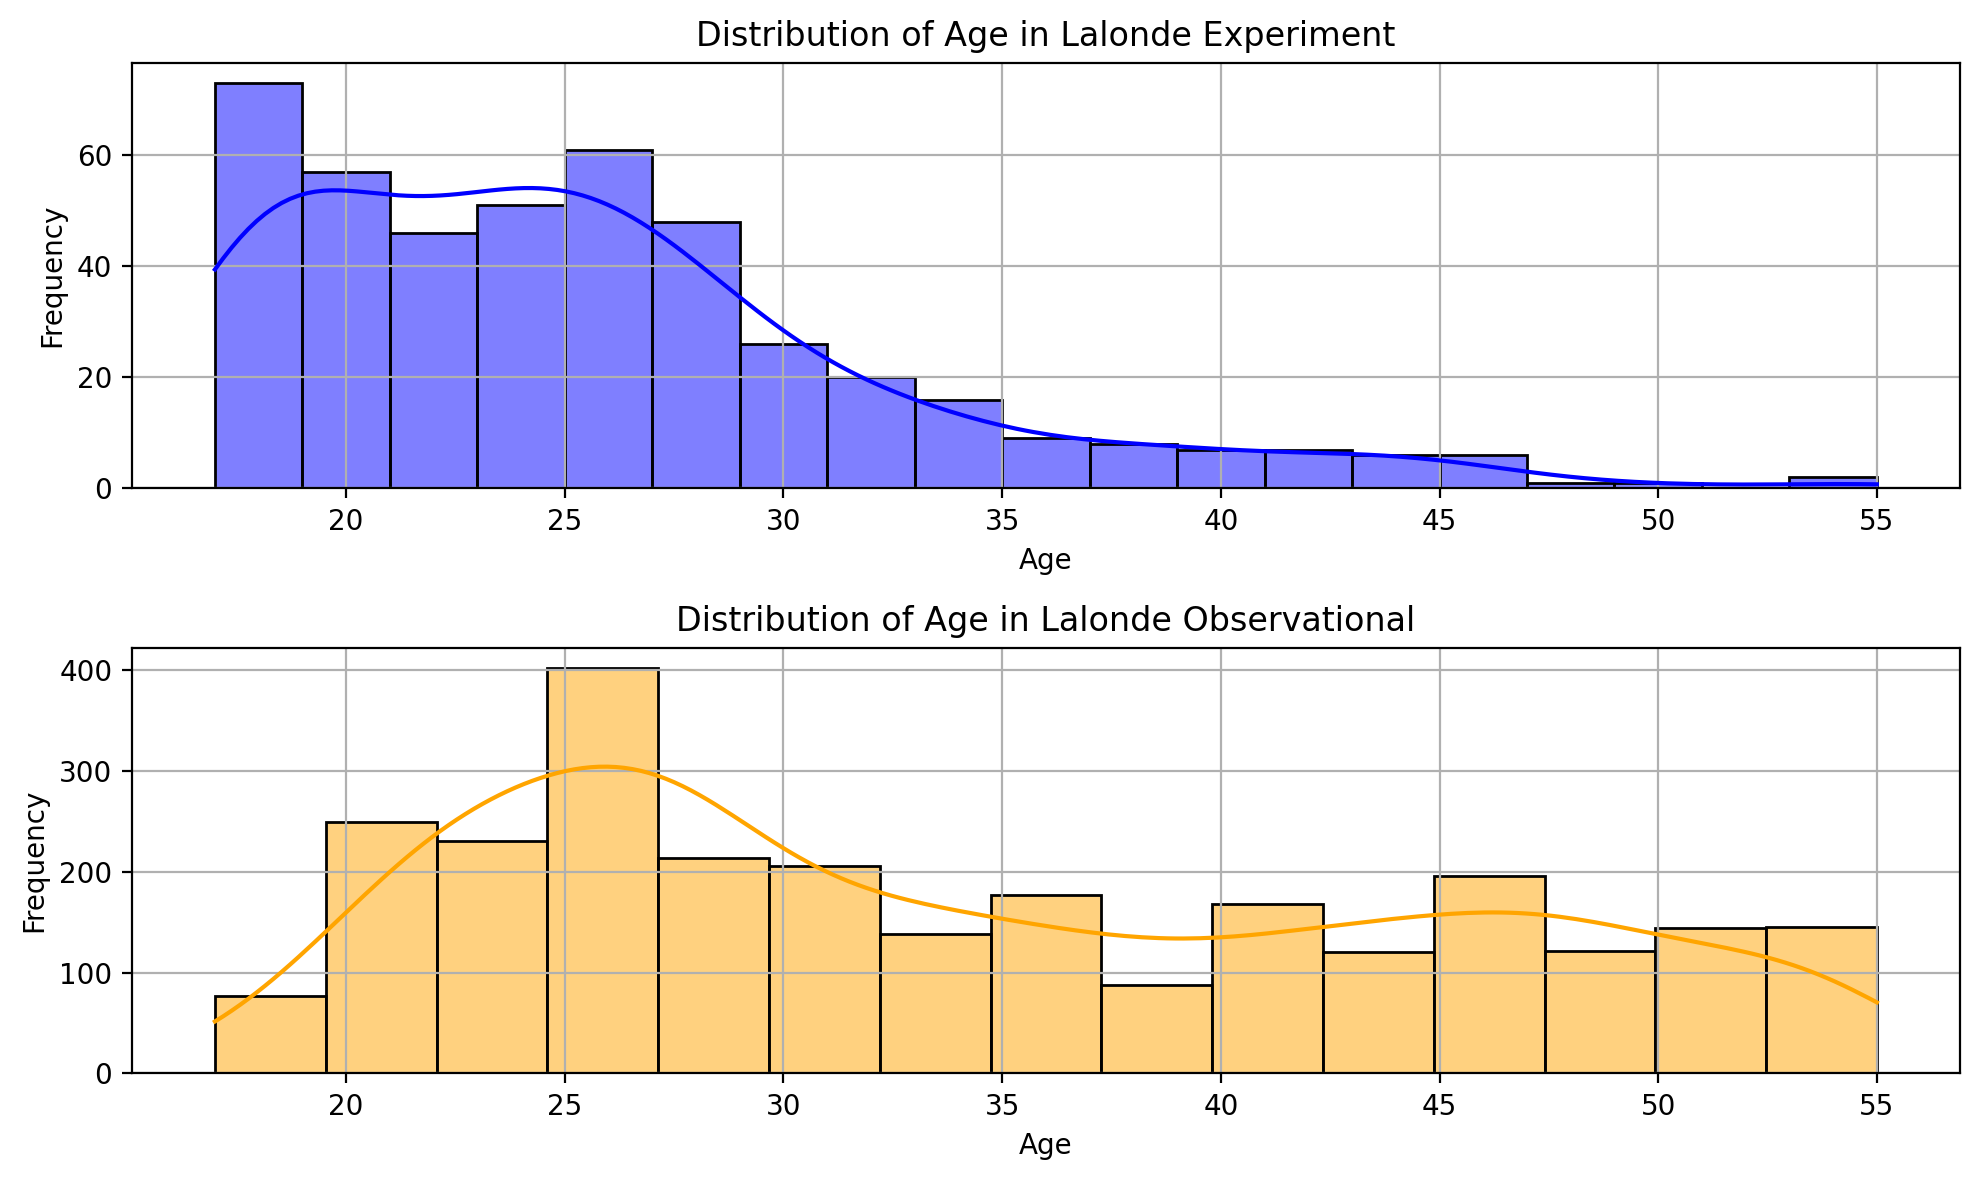

In [4]:
fig, axes = plt.subplots(2, 1, figsize=(10, 6), dpi=200)

sns.histplot(lalonde_exp["age"], kde=True, ax=axes[0], color="blue")
axes[0].set_title("Distribution of Age in Lalonde Experiment")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Frequency")
axes[0].grid(True)

sns.histplot(lalonde_psid["age"], kde=True, ax=axes[1], color="orange")
axes[1].set_title("Distribution of Age in Lalonde Observational")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Frequency")
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Education & No Degree

In [5]:
lalonde_exp["Group"] = "Experimental"
lalonde_psid["Group"] = "Observational"

combined_data = pd.concat([lalonde_exp, lalonde_psid])

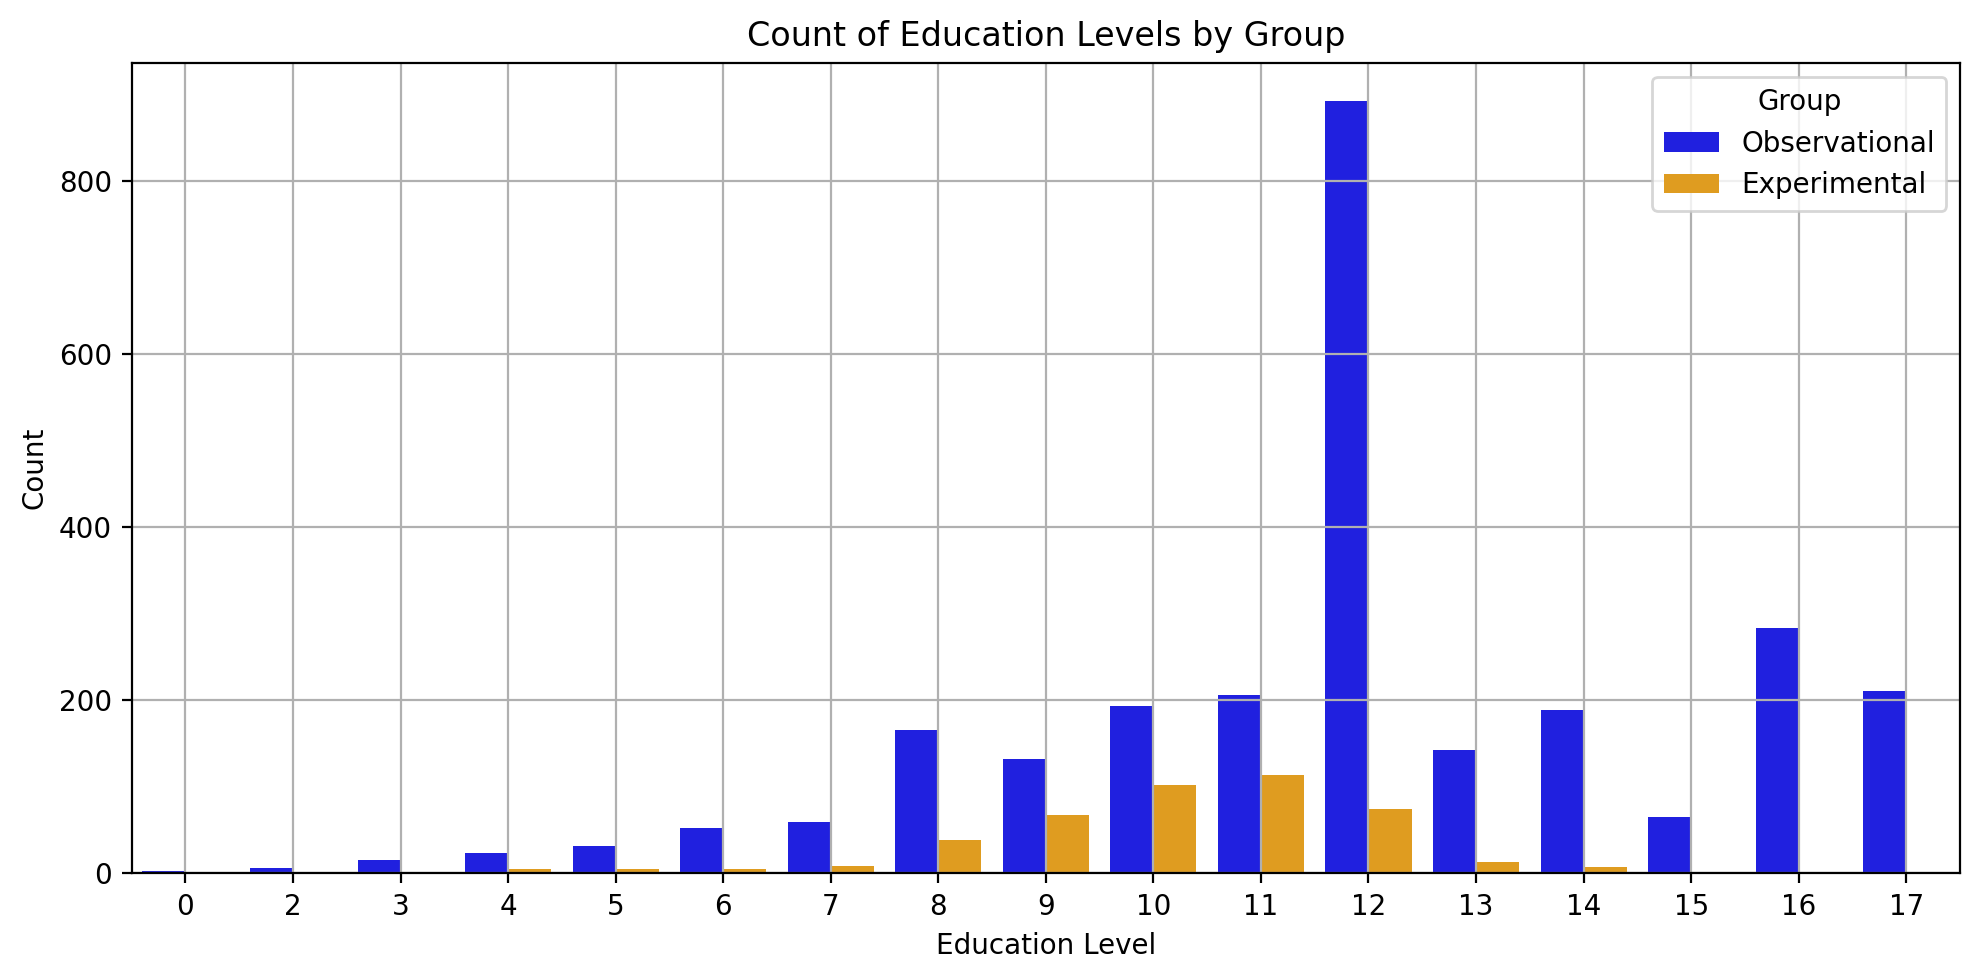

In [6]:
plt.figure(figsize=(10, 5), dpi=200)
sns.countplot(
    x="education",
    hue="Group",
    data=combined_data,
    palette=["blue", "orange"],
    order=sorted(combined_data["education"].unique()),
)

plt.title("Count of Education Levels by Group")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.grid(True)

plt.tight_layout()
plt.show()

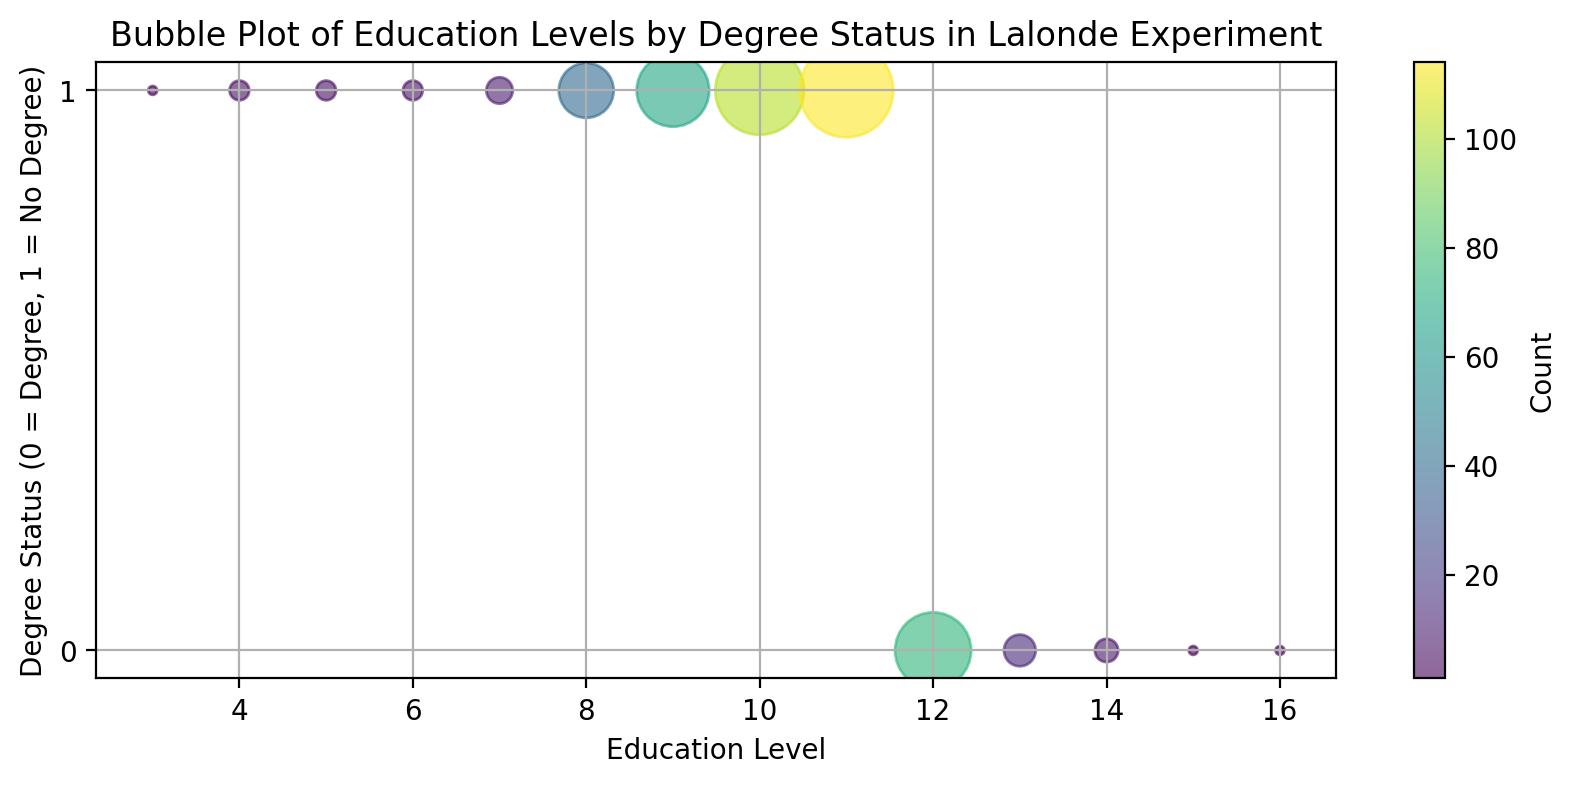

In [7]:
grouped_data = (
    lalonde_exp.groupby(["education", "nodegree"]).size().reset_index(name="counts")
)
plt.figure(figsize=(10, 4), dpi=200)

scatter = plt.scatter(
    x="education",
    y="nodegree",
    s=grouped_data["counts"] * 10,
    c="counts",
    cmap="viridis",
    alpha=0.6,
    data=grouped_data,
)

plt.title("Bubble Plot of Education Levels by Degree Status in Lalonde Experiment")
plt.xlabel("Education Level")
plt.ylabel("Degree Status (0 = Degree, 1 = No Degree)")
plt.colorbar(scatter, label="Count")

plt.grid(True)
plt.yticks([0, 1])
plt.show()

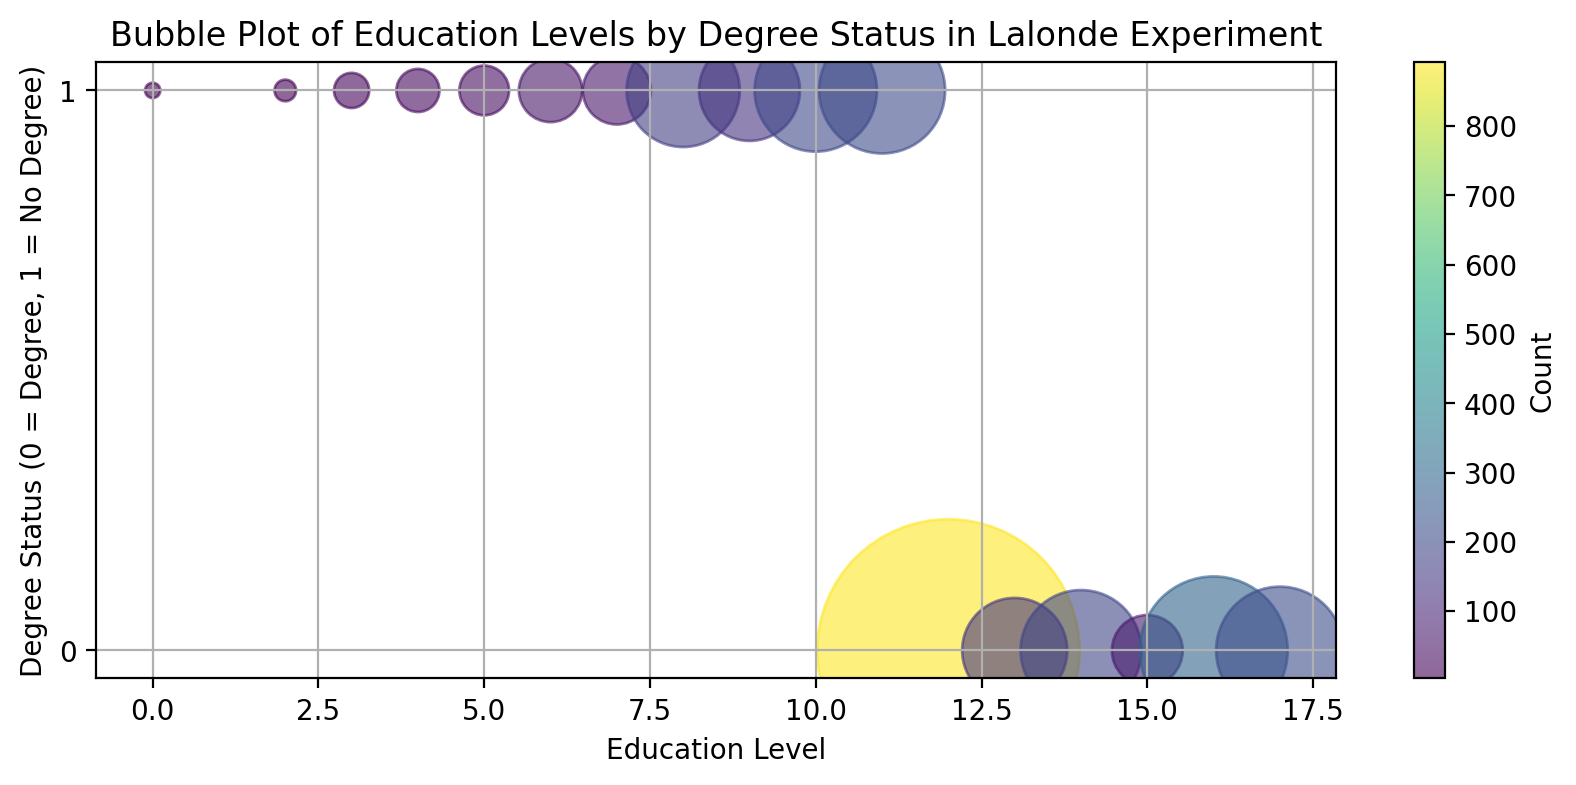

In [8]:
grouped_data = (
    lalonde_psid.groupby(["education", "nodegree"]).size().reset_index(name="counts")
)
plt.figure(figsize=(10, 4), dpi=200)

scatter = plt.scatter(
    x="education",
    y="nodegree",
    s=grouped_data["counts"] * 10,
    c="counts",
    cmap="viridis",
    alpha=0.6,
    data=grouped_data,
)

plt.title("Bubble Plot of Education Levels by Degree Status in Lalonde Experiment")
plt.xlabel("Education Level")
plt.ylabel("Degree Status (0 = Degree, 1 = No Degree)")
plt.colorbar(scatter, label="Count")

plt.grid(True)
plt.yticks([0, 1])
plt.show()

## Race

In [9]:
def categorize_race(row):
    if row["black"] == 1 and row["hispanic"] == 1:
        return "Both"
    elif row["black"] == 1:
        return "Black Only"
    elif row["hispanic"] == 1:
        return "Hispanic Only"
    else:
        return "Neither"

In [10]:
lalonde_exp["race_category"] = lalonde_exp.apply(categorize_race, axis=1)

In [11]:
race_counts = lalonde_exp["race_category"].value_counts().reset_index(name="counts")
race_counts.columns = ["Race Category", "Counts"]
race_counts

,Race Category,Counts
0,Black Only,371
1,Hispanic Only,39
2,Neither,35


## Revenue

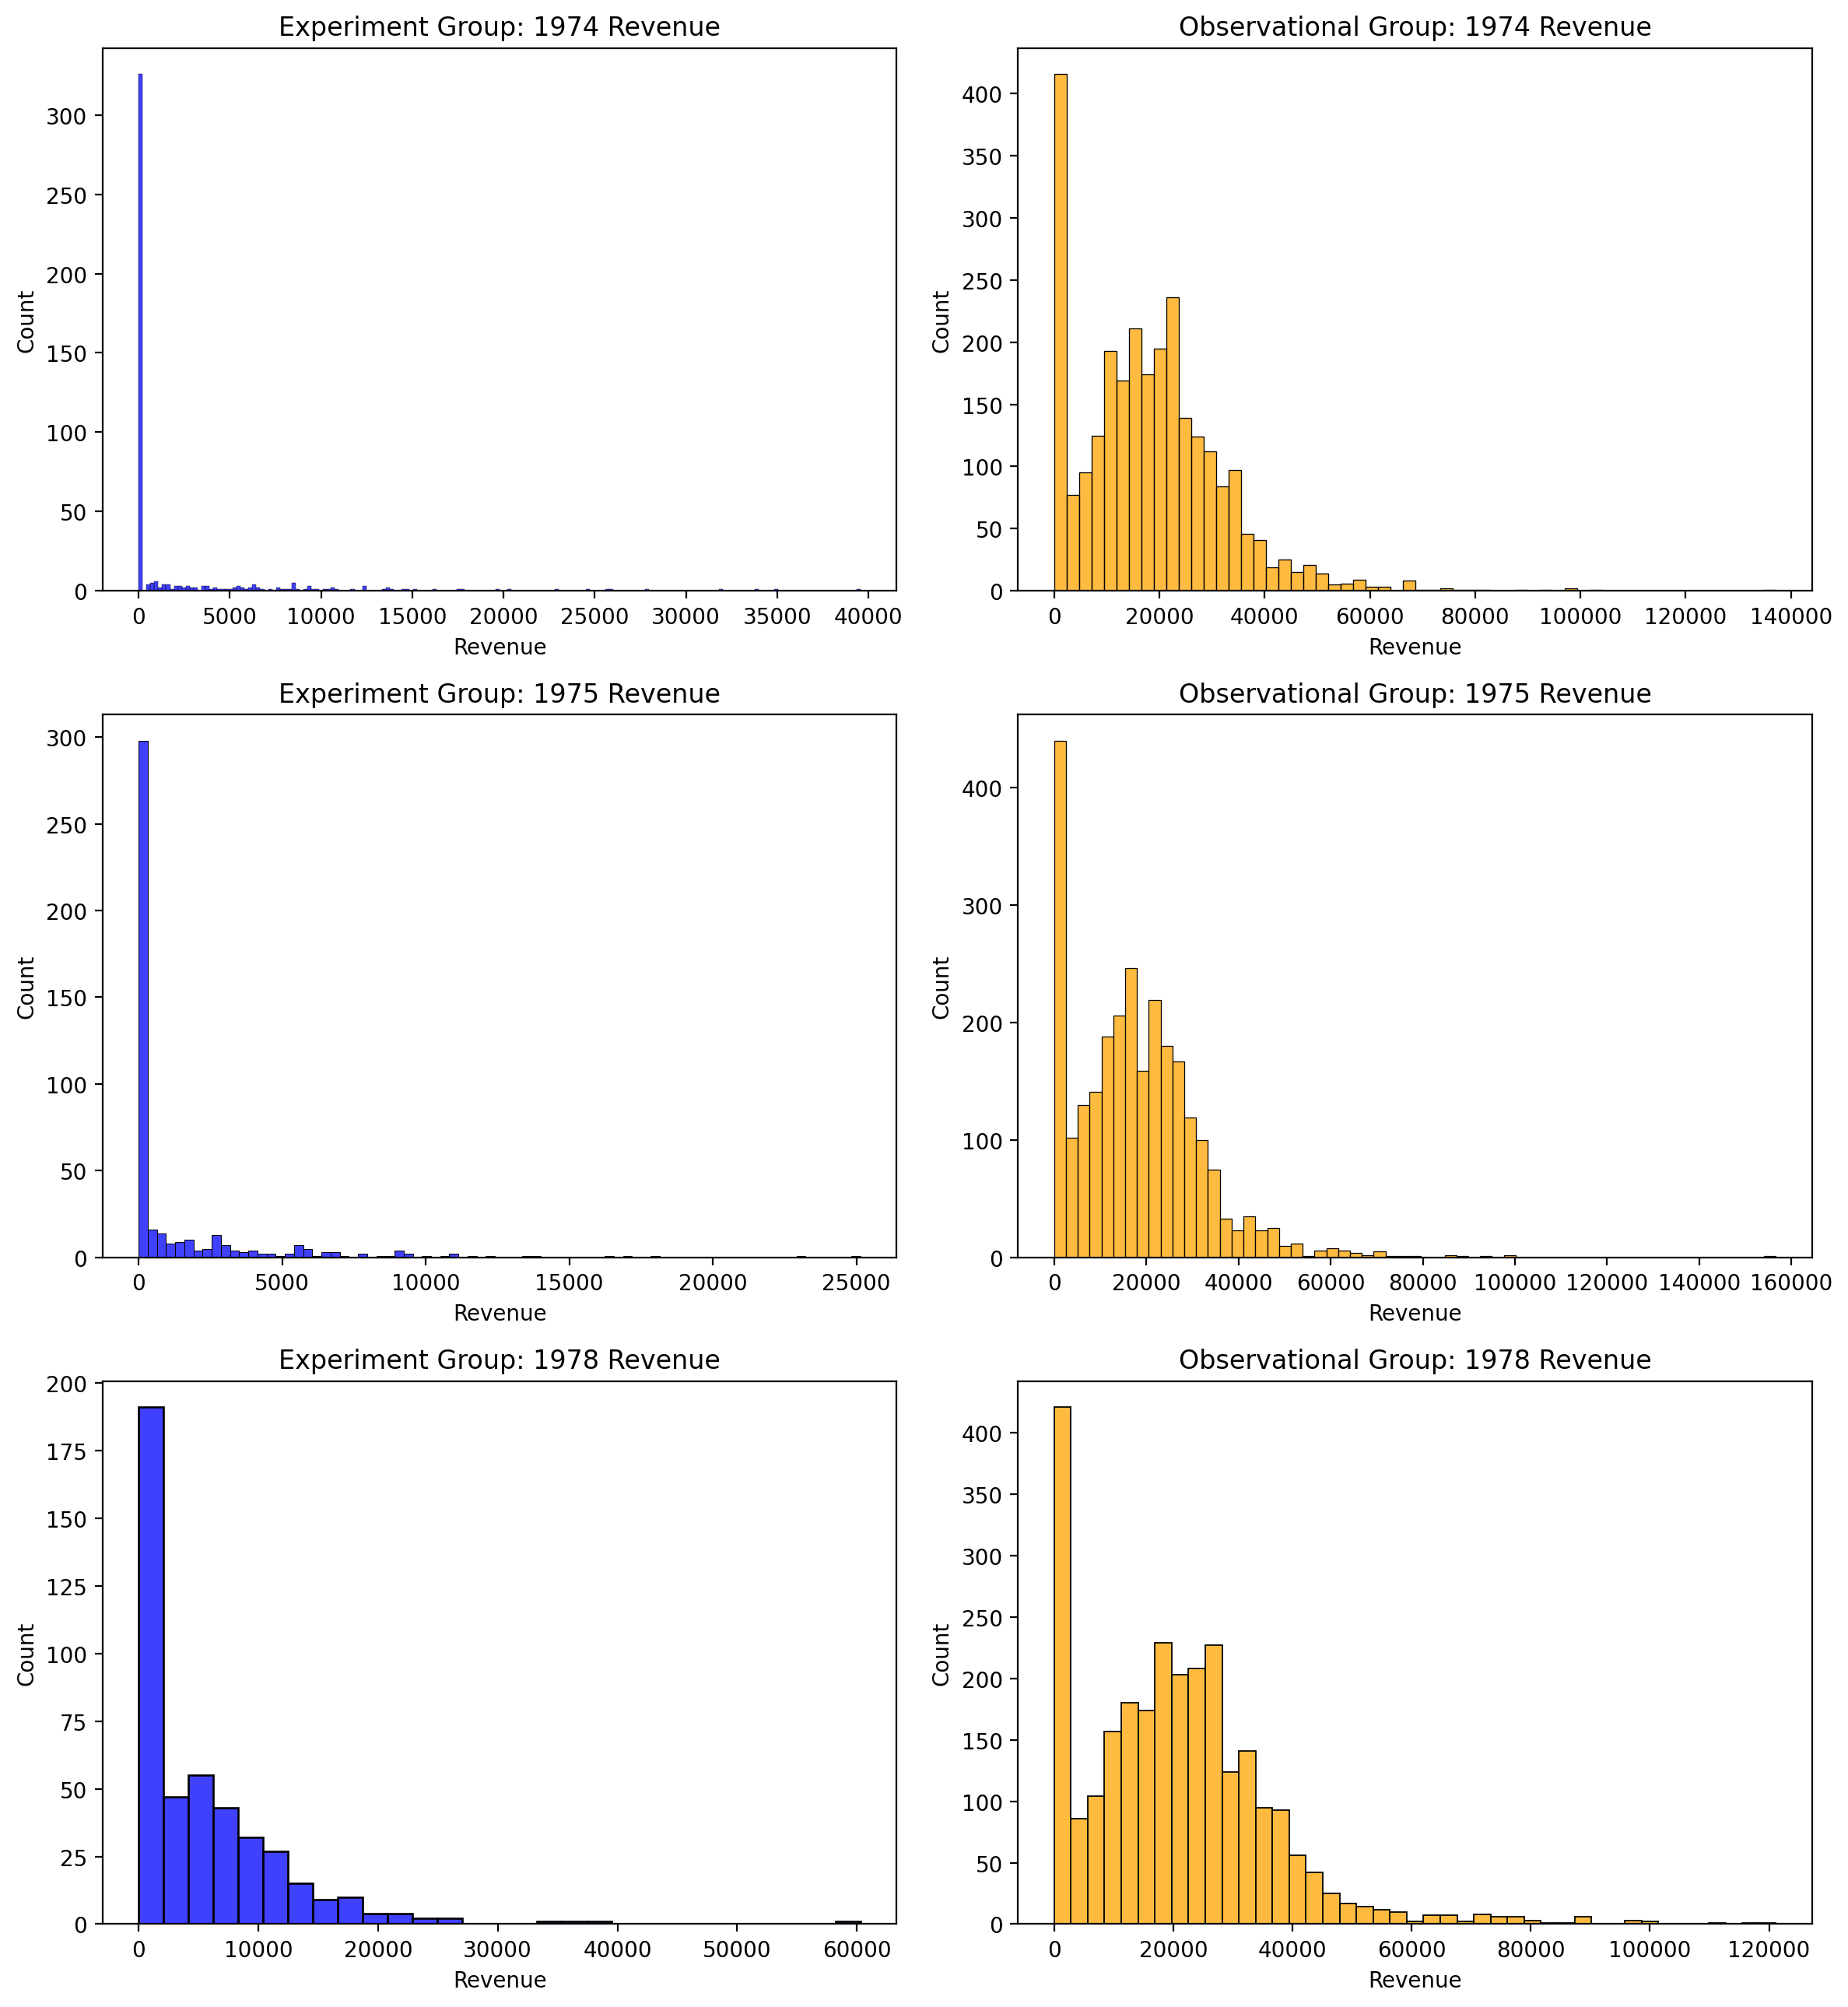

In [12]:
fig, axes = plt.subplots(3, 2, figsize=(12, 13), dpi=200)

titles = ["1974 Revenue", "1975 Revenue", "1978 Revenue"]

for i, column in enumerate(["re74", "re75", "re78"]):
    sns.histplot(lalonde_exp[column], kde=False, ax=axes[i, 0], color="blue")
    axes[i, 0].set_title(f"Experiment Group: {titles[i]}")
    axes[i, 0].set_xlabel("Revenue")
    axes[i, 0].set_ylabel("Count")

    sns.histplot(lalonde_psid[column], kde=False, ax=axes[i, 1], color="orange")
    axes[i, 1].set_title(f"Observational Group: {titles[i]}")
    axes[i, 1].set_xlabel("Revenue")
    axes[i, 1].set_ylabel("Count")

# Adjust layout
plt.tight_layout()
plt.show()